# Laboratory work  1

**Фильтрация изображений**

Completed: гр.№ 6131-010402D, Griaznov Ilia

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2 as cv
import copy
import math
from PIL import Image
import numpy as np
import cv2
from skimage.io import imread, imshow, imsave
from skimage import img_as_float, img_as_ubyte
from numpy import clip
from numpy import dstack
from matplotlib import pyplot as plt
import random
from matplotlib.pyplot import hist

%matplotlib inline

1. Считать цветное rgb изображение
2. Преобразовать изображение в градации серого
3. Написать функцию реализации препарирования изображения

> Функцию вида fun(Image, prepfun)  
Где prepfun  - конкретная функция препаирования, заданная в том или ином виде

4. По гистограмме изображения определить значение порога яркостей, обеспечивающего оптимальное разделение объекта и фона. Осуществить пороговую обработку входного изображения с найденным пороговым значением
  *   Вход: изображение из пункта 2
  *   Вывод: входное и результирующие изображение и их гистограммы соответственно
  *   Порог определить на глаз по гистограмме
5. Сделать пороговую обработку методом Otsu (Функция OpenCV)
  *   Вход: изображение из пункта 2
  *   Вывод: входное и результирующие изображение и их гистограммы соответственно
6. Определить динамический диапазон входного изображения. Осуществить линейное контрастирование входного изображения в заданный динамический диапазон яркостей
  *   Вход: изображение у которого диапазон не на всем промежутке [0,255] или использовать 

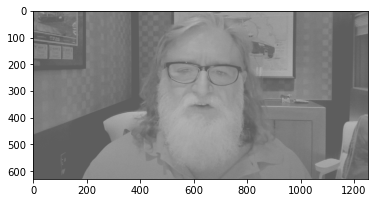

In [2]:
image = cv2.imread("index.png")
plt.imshow(image)
plt.show()

*   Вывод: входное и результирующие изображение и их гистограммы соответственно
  *   Вычислить коэффициенты a и b. Сделать преобразование вида g =a*f+b
7. Сделать эквализацию гистограммы изображения
  *   Вход: изображение из пункта 2
  *   Вывод: входное и результирующие изображение и их гистограммы соответственно
8. Сделать эквализацию методом CLAHE (Функция OpenCV)
  *   Вход: изображение из пункта 2
  *   Вывод: входное и результирующие изображение и их гистограммы соответственно
9. Осуществить препарирование изображения с заданной препарирующей функцией
  *   Вход: изображение из пункта 2
  *   Вывод: входное и результирующие изображение и их гистограммы соответственно. График препарирующий функции.
  *   Пороги в препарирующей функции выбирать самостоятельно
  
    
    
*Для работы с изображением использовать OpenCV (открытие, сохранение и т.д.). Для визуализации можно использовать matplotlib. Все необходимые для задания функции реализовавать самим, а не использовать готовые в OpenCV, если не указано обратного. После преобразований изображений выводить их гистограммы.*

### 1. Считать цветное rgb изображение

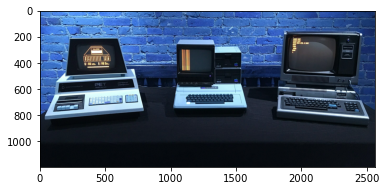

In [3]:
image = cv2.imread("img.jpg")
plt.imshow(image)
plt.show()

In [4]:
image.shape

(1194, 2560, 3)

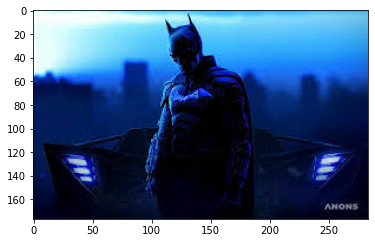

In [5]:
image1 = cv2.imread("images1.jpg")
plt.imshow(image1)
plt.show()

In [6]:
image1.shape

(177, 284, 3)

### 2. Преобразовать изображение в градации серого

In [7]:
# Библиотекой
img = Image.open("images1.jpg").convert('LA')

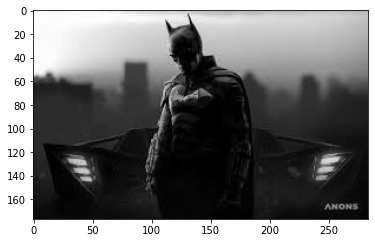

In [8]:
plt.imshow(img)
plt.show()

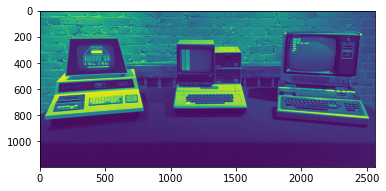

In [9]:
# Самостоятельно

# Сренее значение
img_f = img_as_float(image)

avg_gray = (img_f[:, :, 0] +  img_f[:, :, 1] + img_f[:, :, 2]) /3
plt.imshow(avg_gray)


In [10]:
avg_gray.shape

(1194, 2560)

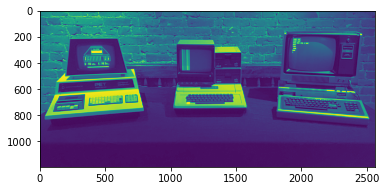

In [11]:
img_gray = (img_f[:, :, 0] * 0.2126 + img_f[:, :, 1] * 0.7152 + img_f[:, :, 2] * 0.0722)
plt.imshow(img_gray)

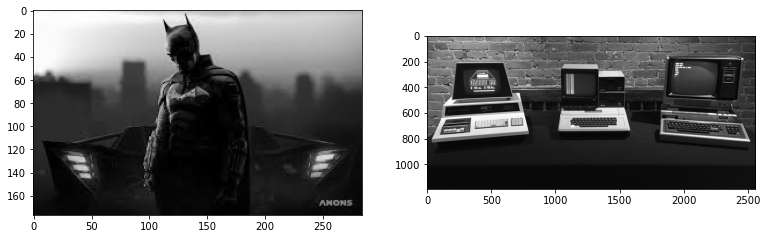

In [12]:
img_gray = img_as_ubyte(img_gray)

plt.figure(figsize = (20,20))

plt.subplot(1, 3, 1)

plt.imshow(img, cmap = plt.cm.gist_gray)
plt.subplot(1, 3, 2)

plt.imshow(img_gray, cmap=plt.cm.gist_gray)
plt.show()

### 3. Написать функцию реализации препарирования изображения

> Препарирование используется, когда необходимо подчеркнуть, усилить какие-то черты, особенности, нюансы наблюдаемого изображения с целью улучшения субъективного восприятия.

In [13]:
# Функция совершает препарирование картинки

def prepare_OLD(input_image, dot1, dot2): # просто оставил старый вариант
    output_image = input_image.copy()
    output_image[output_image <= dot1] = 0
    output_image[output_image >= dot2] = 0
    output_image = np.where((output_image > dot1) & (output_image < dot2), ((output_image-dot1)/(dot2-dot1)*255).astype(int), output_image)
    return output_image

In [14]:
def prepare_func_v3(x):
    if x <= 80:
      return 0
    elif x >= 230:
      return 0
    else:
      return x

In [15]:
def prepare_v3(input_image, func):
    new_function = np.vectorize(func)
    return new_function(input_image)

### 4. По гистограмме входного изображения определить значение порога яркостей, обеспечивающего оптимальное разделение объекта и фона. Осуществить пороговую обработку входного изображения с найденным пороговым значением.

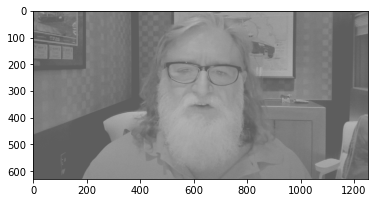

In [16]:
im = cv2.imread("index.png")
plt.imshow(im)

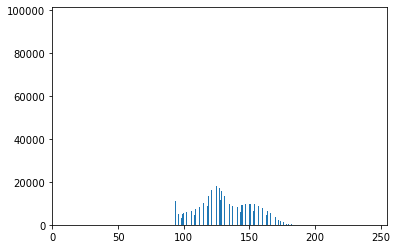

In [17]:
# Рассчет среднего значения из каналов RGB и сгладить до массива 1D
vals = im.mean(axis=2).flatten()


# построение гистограммы с 255 интервалами
b, bins, patches = plt.hist(vals, 255)
plt.xlim([0,255])
plt.show()

threshold_value = 100


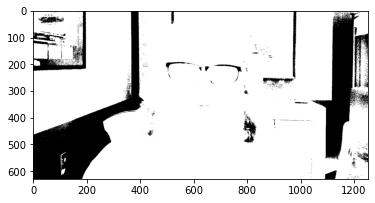

threshold_value = 115


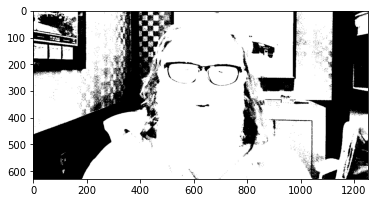

threshold_value = 130


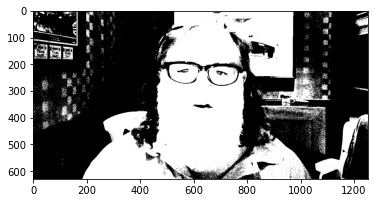

threshold_value = 145


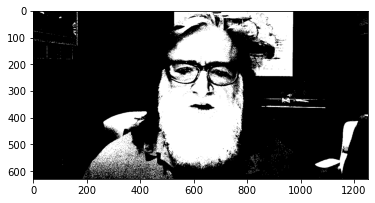

threshold_value = 160


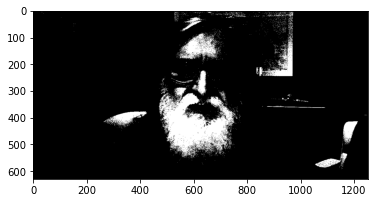

threshold_value = 175


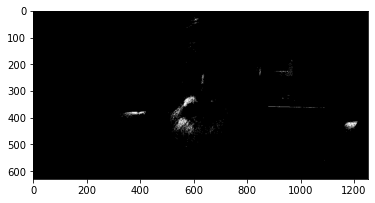

threshold_value = 190


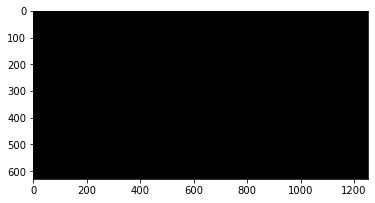

threshold_value = 205


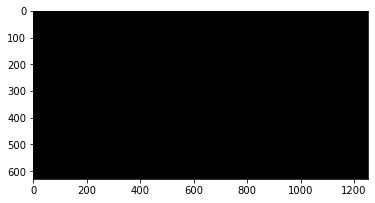

threshold_value = 220


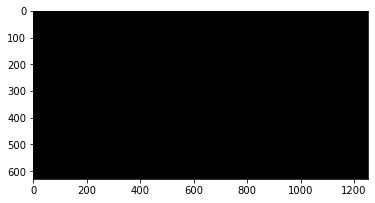

threshold_value = 235


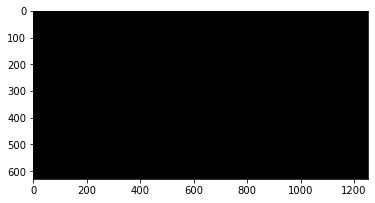

In [18]:
for threshold_value in range (100,250,15):

    print("threshold_value =", threshold_value)
    plt.figure()
    img_threshold = np.where(np.array(im)<=threshold_value, 0, 255)
    plt.imshow(img_threshold)
    plt.show()


### Вывод:
По гистограмме изображения определил два "пика" яркостей, предположив эти значения как пороги яркостей, обеспечивающего оптимальное разделение объекта и фона. Эти значения примерно 120 и 150. Далее императивным путем провел проверку и визуально увидел, что наиболее приемлемый порог в `threshold_value = 140`

Ниже представлены входное и результирующие изображение и их гистограммы соответственно:



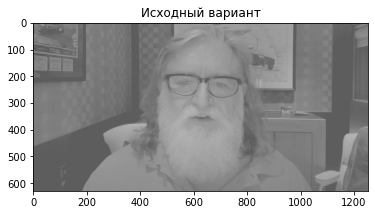

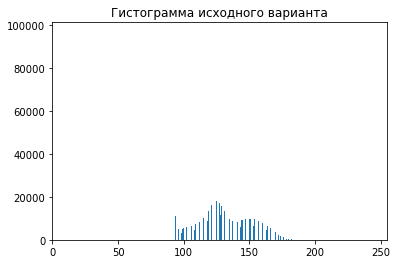

In [19]:
plt.figure()
plt.title("Исходный вариант")
plt.imshow(im)

plt.figure()
plt.title("Гистограмма исходного варианта")
# Рассчет среднего значения из каналов RGB и сгладить до массива 1D
vals = im.mean(axis=2).flatten()
# построение гистограммы с 255 интервалами
plt.hist(vals, 255)
plt.xlim([0,255])
plt.show()

<Figure size 432x288 with 0 Axes>

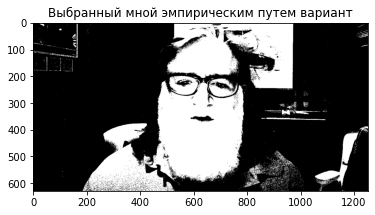

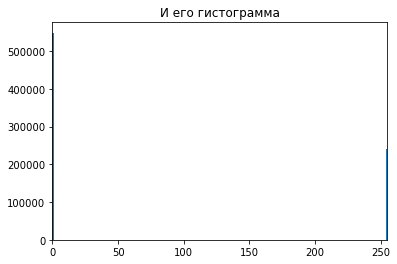

In [20]:
# Наилучший результат достигается при threshold_value = 140
threshold_value = 140
plt.figure()
img_threshold = np.where(np.array(im)<=threshold_value, 0, 255)

plt.figure()
plt.title("Выбранный мной эмпирическим путем вариант")

plt.imshow(img_threshold)
plt.show()


plt.figure()
plt.title("И его гистограмма")
# Рассчет среднего значения из каналов RGB и сгладить до массива 1D
vals = img_threshold.mean(axis=2).flatten()
# построение гистограммы с 255 интервалами
plt.hist(vals, 255)
plt.xlim([0,255])
plt.show()

### 5. Сделать пороговую обработку методом Otsu (Функция OpenCV)

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x2cb6ec156d0>)

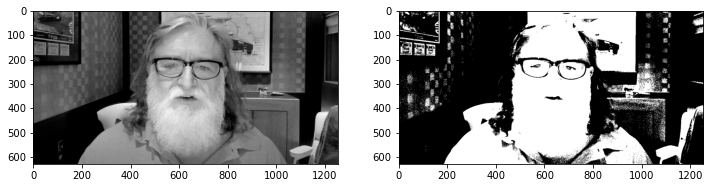

In [21]:
img_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY) 
# Заново в режиме серого


ret, th1 = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.figure(figsize=(12,10))
plt.subplot(221),plt.imshow(img_gray,'gray')
plt.subplot(222),plt.imshow(th1,'gray')

### 6. Определить динамический диапазон входного изображения. Осуществить линейное контрастирование входного изображения в заданный динамический диапазон яркостей

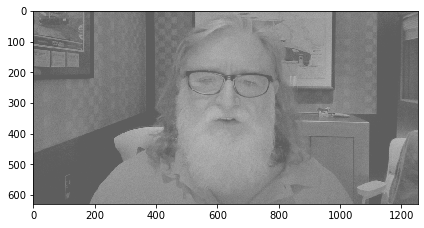

In [22]:
linear_contrast = imread("index.png") 
# linear_contrast
imshow(linear_contrast)

In [23]:
linear_contrast.shape

(629, 1253, 4)

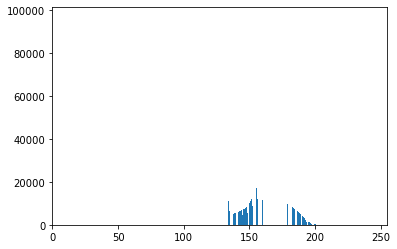

In [24]:
# Рассчет среднего значения из каналов RGB и сгладить до массива 1D
vals = linear_contrast.mean(axis=2).flatten()
# построение гистограммы с 255 интервалами
b, bins, patches = plt.hist(vals, 255)
plt.xlim([0,255])
plt.show()

In [25]:
f_min = linear_contrast.min()
f_max = linear_contrast.max()
print("f_min =", f_min)
print("f_max =", f_max)

f_min = 93
f_max = 255


In [26]:
# Приняв гистограмму исходного изображения, min и max значения интенсивности пикселей, делаем линейное контрастирование.


#     Данная функция делает линейное контрастирование над input_image.
#     Т.е. входной диапазон [f_min, f_max] растягивает на диапазон [g_min, g_max]

def linear_contrasting(input_image, f_min, f_max, g_min, g_max):
    a = (g_max-g_min)/(f_max-f_min)
    b = (g_min*f_max-g_max*f_min)/(f_max-f_min)
    output_image = (a * input_image + b).astype(int) # linear contrasting
    return output_image

In [27]:
im_g = linear_contrasting(im, f_min, f_max, 0, 250)

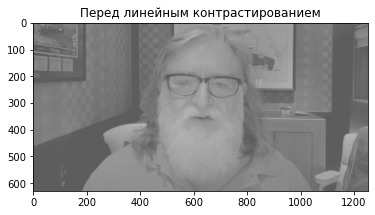

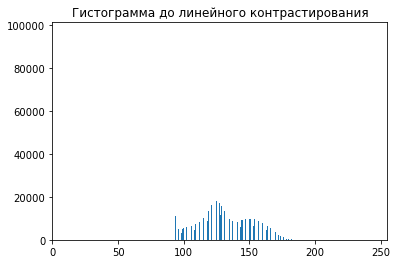

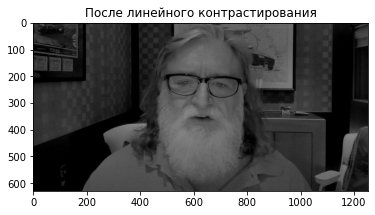

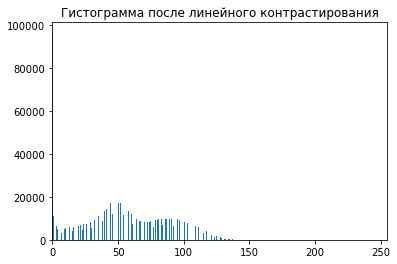

In [28]:
plt.figure()
plt.title("Перед линейным контрастированием")
plt.imshow(im)

plt.figure()
plt.title("Гистограмма до линейного контрастирования")
# Рассчет среднего значения из каналов RGB и сгладить до массива 1D
vals = im.mean(axis=2).flatten()
# построение гистограммы с 255 интервалами
plt.hist(vals, 255)
plt.xlim([0,255])
plt.show()

plt.figure()
plt.title("После линейного контрастирования")
plt.imshow(im_g)

plt.figure()
plt.title("Гистограмма после линейного контрастирования")
# Рассчет среднего значения из каналов RGB и сгладить до массива 1D
vals = im_g.mean(axis=2).flatten()
# построение гистограммы с 255 интервалами
plt.hist(vals, 255)
plt.xlim([0,255])
plt.show()

### 7. Сделать эквализацию гистограммы изображения

In [29]:
def cdf(im):
    values, bin_edges = np.histogram(im.ravel(), bins=range(257))
    new_value = values.cumsum()
    return new_value


def f (new_value, im):
    cdf_min = new_value[new_value != 0].min()
    col_px = new_value[-1] - 1
  
    return np.round((new_value[im] - cdf_min) * 255 / col_px)

In [30]:
def equaliz(im):
    new_im = im.copy()
    new_value = cdf(new_im)
    img_eq = f(new_value, new_im)
    return np.int_(img_eq)

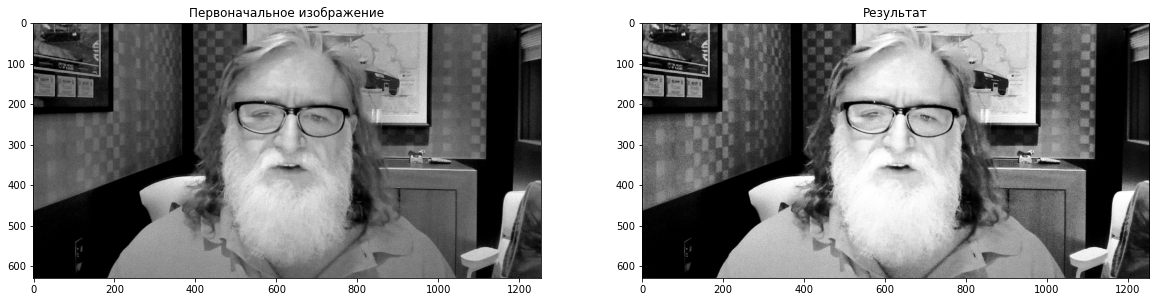

In [31]:
imm = equaliz(img_gray)

plt.figure(figsize=(20,20))
plt.subplot(1, 2, 1)
plt.title('Первоначальное изображение')
plt.imshow(img_gray, cmap=plt.cm.gist_gray)

plt.subplot(1, 2, 2)
plt.title('Результат')
plt.imshow(imm, cmap=plt.cm.gist_gray)
plt.show()

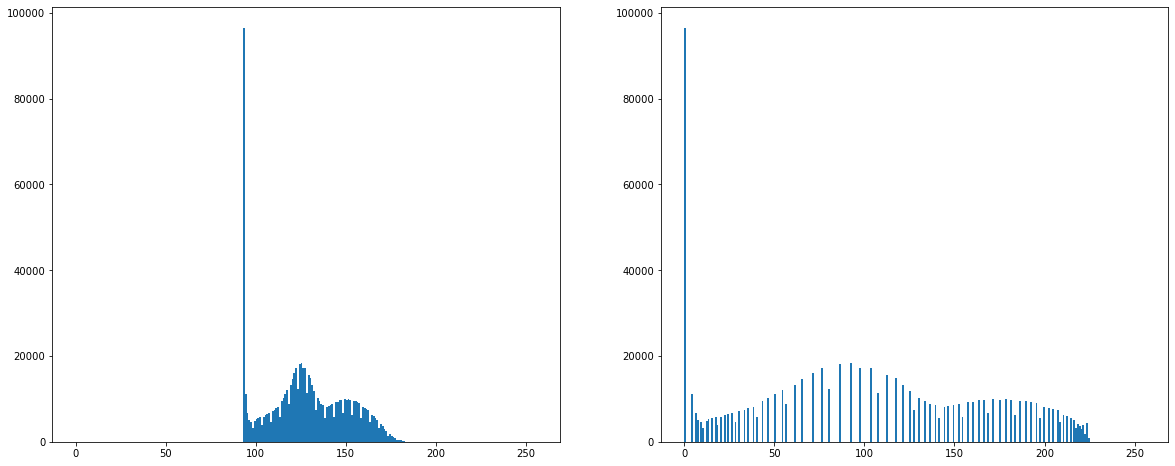

In [32]:
plt.figure(figsize=(20,8))
plt.subplot(1, 2, 1)
plt.hist(img_gray.ravel(), 256, [0, 256])
plt.subplot(1, 2, 2)
plt.hist(imm.ravel(), 256, [0, 256])
plt.show()

### 8. Сделать эквализацию методом CLAHE (Функция OpenCV)

In [33]:
clahe = cv2.createCLAHE(clipLimit = 2)

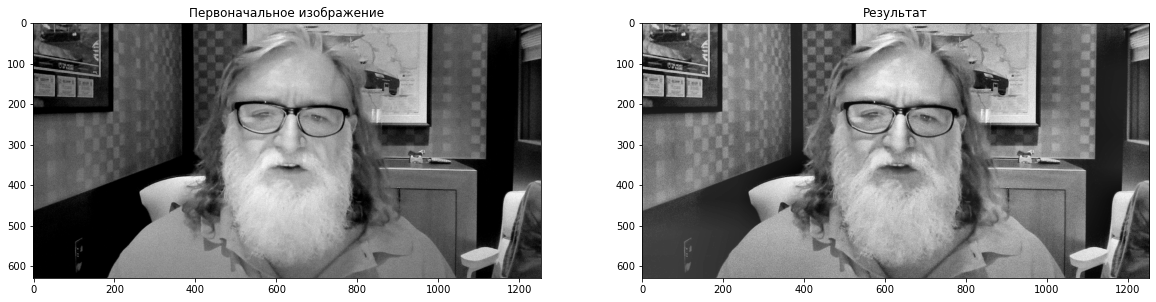

In [34]:
imm = clahe.apply(img_gray)
plt.figure(figsize=(20,20))
plt.subplot(1, 2, 1)
plt.title('Первоначальное изображение')
plt.imshow(img_gray, cmap=plt.cm.gist_gray)

plt.subplot(1, 2, 2)
plt.title('Результат')
plt.imshow(imm, cmap=plt.cm.gist_gray)
plt.show()

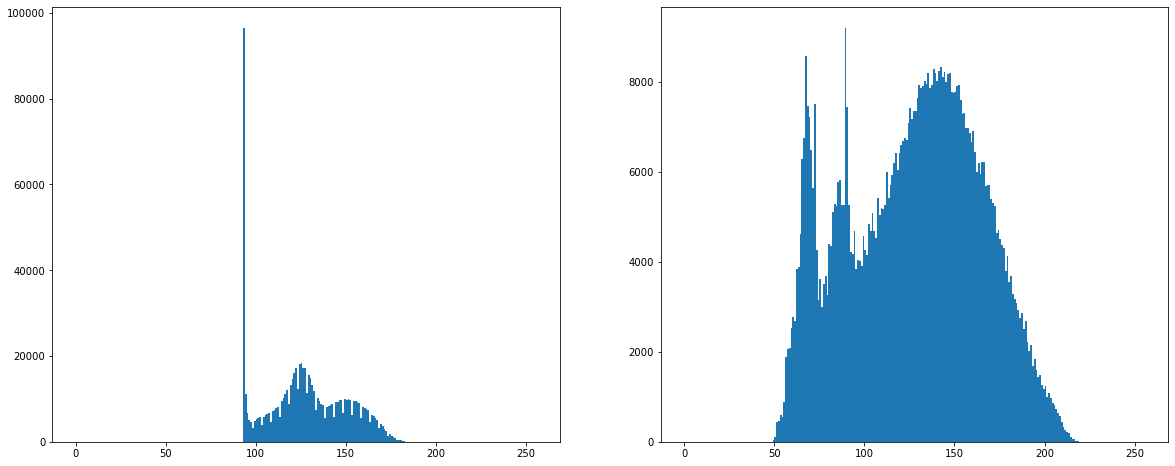

In [35]:
plt.figure(figsize=(20,8))
plt.subplot(1, 2, 1)
plt.hist(img_gray.ravel(), 256, [0, 256])
plt.subplot(1, 2, 2)
plt.hist(imm.ravel(), 256, [0, 256])
plt.show()

### 9. Осуществить препарирование изображения с заданной препарирующей функцией

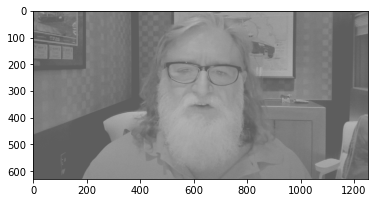

In [36]:
# Берем исходное изображение из задания
im = cv2.imread('index.png')
plt.imshow(im)

In [37]:
# Размерность
im.shape

(629, 1253, 3)

In [38]:
# проверяем работу функции на заданном массиве

arr = np.random.randint(0, 255, (6, 6))
print("arr =\n", arr)

im_prep_test = prepare_v3(arr, prepare_func_v3)

print("\nim_prep_test =\n", im_prep_test)

arr =
 [[ 89 210 253 170 201  99]
 [158 161   2 112  18 139]
 [120 156 121 212   3  19]
 [156 183  50  48 105  67]
 [214 248  66  94  94 158]
 [112 217 251 215 199  66]]

im_prep_test =
 [[ 89 210   0 170 201  99]
 [158 161   0 112   0 139]
 [120 156 121 212   0   0]
 [156 183   0   0 105   0]
 [214   0   0  94  94 158]
 [112 217   0 215 199   0]]


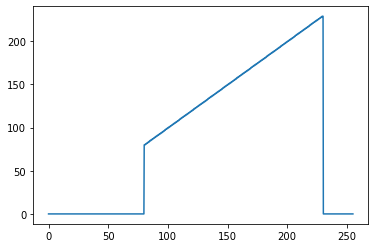

In [39]:
dot1 = 80
dot2 = 230

x = np.linspace(0, 255, 1000)

y = prepare_v3(x, prepare_func_v3)

plt.figure()
plt.plot(x, y)

im_prep = prepare_v3(im, prepare_func_v3)

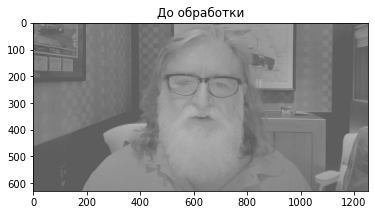

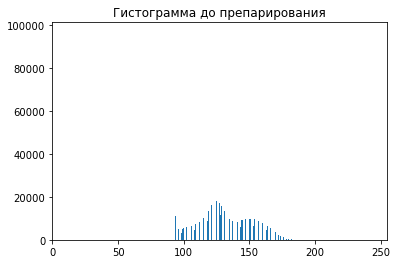

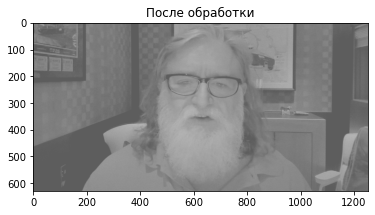

dot1 = 80
dot2 = 230


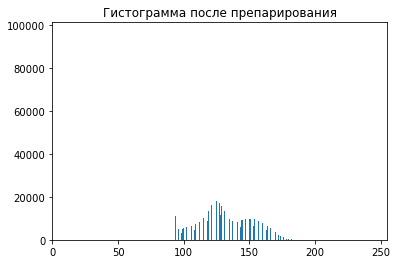

In [40]:
plt.figure()
plt.title("До обработки")
plt.imshow(im)
plt.show()

plt.figure()
plt.title("Гистограмма до препарирования") 


# Рассчет среднего значения из каналов RGB и сгладить до массива 1D

vals = im.mean(axis=2).flatten()

#график гистограммы с 255 ячейками

plt.hist(vals, 255)
plt.xlim([0,255])
plt.show()


plt.figure()
plt.title("После обработки")
plt.imshow(im_prep)
plt.show()

plt.figure()
plt.title("Гистограмма после препарирования")


# Рассчет среднего значения из каналов RGB и сгладить до массива 1D

vals = im_prep.mean(axis=2).flatten()

# график гистограммы с 255 ячейками
plt.hist(vals, 255)
plt.xlim([0,255])
plt.show

print("dot1 =", dot1)
print("dot2 =", dot2)